## First test of a global simulation

In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import matplotlib.patches as mpatches


## What did noise look like before?

In [2]:
dataDir   = '/Users/mdfowler/Documents/Analysis/NoiseIssue/Data_CLASPcomparison/'

ctrlData  = dataDir+'f.e21.FHIST_BGC.f09_f09_mg17.SfcWindNoiseTicket.001.cam.h0.allTimes_UV.nc'
claspData = dataDir+'2000_CAM60_CLM50%SP_CICE%PRES_DOCN%DOM_MOSART_SGLC_SWAV.f09_f09_mg17.CLASPglobal_onlyRtpThlpMoments_20minDT_HTG.001.cam.h1.allTimes_UV.nc'

ctrlDS      = xr.open_dataset(ctrlData,  decode_times=True)
claspDS     = xr.open_dataset(claspData, decode_times=True)


**Control case**

In [26]:
# Get indices 
lat  = ctrlDS['lat'].values
lon  = ctrlDS['lon'].values
lev  = ctrlDS['lev'].values

nlat = len(lat)
nlon = len(lon)
nlev = len(lev)

In [31]:
# Get approximate second derivative following Sean Santos' code below
LEV = nlev - 1
DAYoffset = 48+24

u1 = ctrlDS['U'][0+DAYoffset,LEV,:,:]
u2 = ctrlDS['U'][1+DAYoffset,LEV,:,:]
u3 = ctrlDS['U'][2+DAYoffset,LEV,:,:]

v1 = ctrlDS['V'][0+DAYoffset,LEV,:,:]
v2 = ctrlDS['V'][1+DAYoffset,LEV,:,:]
v3 = ctrlDS['V'][2+DAYoffset,LEV,:,:]

ud2 = u1 - 2*u2 + u3
vd2 = v1 - 2*v2 + v3


In [32]:
# Find column with large oscillations in wind speed
# To force focus on a particular column, just set the number here.
ifocus = -1

if ifocus == -1:
    print("Searching for oscillatory point.")
    maxd2 = 0.
    #for icol in column_set:
    for ilat in range(len(lat)):
        for ilon in range(len(lon)):
            d2 = np.sqrt(ud2[ilat,ilon]*ud2[ilat,ilon] + vd2[ilat,ilon]*vd2[ilat,ilon])
            if d2 > maxd2:
                maxd2 = d2
                ifocus_lat = ilat
                ifocus_lon = ilon

    assert ifocus_lat >= 0, "no focus column found"


Searching for oscillatory point.


In [36]:
print("Worst oscillations at lat = ",
      lat[ifocus_lat], ", lon = ", lon[ifocus_lon])

Worst oscillations at lat =  53.24607329842931 , lon =  270.0


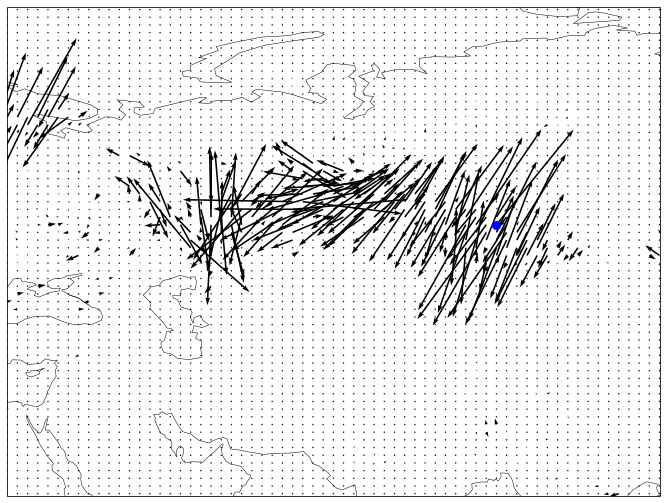

In [39]:
# Find columns in box over South America.
minLat = -20.
maxLat = 10.
minLon = 280.
maxLon = 315.

fig, axs = plt.subplots(1,1, figsize=(17, 9), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180.0)})

axs.coastlines(linewidth=0.5,edgecolor='blue')
# axs.set_extent([minLon,maxLon+6,minLat,maxLat], crs=ccrs.PlateCarree())

axs.plot(lon[ifocus_lon], lat[ifocus_lat],'o',color='blue',markersize=8,
        transform=ccrs.PlateCarree(central_longitude=180.0))
axs.quiver(lon, lat, ud2, vd2,
           scale=100., scale_units='height', angles='xy')

axs.set_extent([30,110,20,80], crs=ccrs.PlateCarree())



(0.0, 22.0)

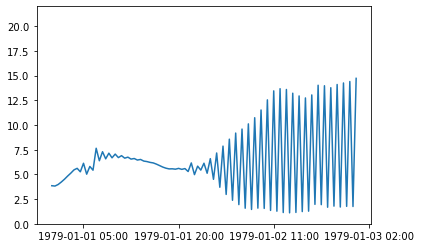

In [40]:
UBOT = np.sqrt( (ctrlDS.U.values[:,-1,ifocus_lat,ifocus_lon])**2 + 
                (ctrlDS.V.values[:,-1,ifocus_lat,ifocus_lon])**2)

# plt.plot(ctrlDS.time.values, ctrlDS.U10.values[:,ifocus_lat,ifocus_lon])
plt.plot(ctrlDS.time.values, UBOT)
plt.ylim([0,22])


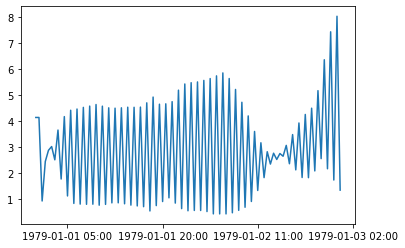

In [49]:
# Plot U10 oscillations too...
plt.plot(ctrlDS.time.values, ctrlDS.U10.values[:,ifocus_lat,ifocus_lon])


**CLASP global test**

In [41]:
## Delete variables from contorl case 

del u1 
del u2 
del u3
del v1
del v2
del v3
del ud2
del vd2 
del ifocus_lat
del ifocus_lon
del nlev 
del LEV 


In [42]:
# Get indices 
lat  = claspDS['lat'].values
lon  = claspDS['lon'].values
lev  = claspDS['lev'].values

nlat = len(lat)
nlon = len(lon)
nlev = len(lev)

In [43]:
# Get approximate second derivative following Sean Santos' code below
LEV = nlev - 1
print('Using level ', LEV)
DAYoffset = 48+24

u1 = claspDS['U'][0+DAYoffset,LEV,:,:]
u2 = claspDS['U'][1+DAYoffset,LEV,:,:]
u3 = claspDS['U'][2+DAYoffset,LEV,:,:]

v1 = claspDS['V'][0+DAYoffset,LEV,:,:]
v2 = claspDS['V'][1+DAYoffset,LEV,:,:]
v3 = claspDS['V'][2+DAYoffset,LEV,:,:]

ud2 = u1 - 2*u2 + u3
vd2 = v1 - 2*v2 + v3


Using level  63


In [44]:
print('Starting time: ', claspDS.time.values[0])
print('Time + ',DAYoffset,': ', claspDS.time.values[0+DAYoffset])


Starting time:  0001-01-01 00:00:00
Time +  72 :  0001-01-02 12:00:00


In [45]:
# Find column with large oscillations in wind speed
# To force focus on a particular column, just set the number here.
ifocus = -1

if ifocus == -1:
    print("Searching for oscillatory point.")
    maxd2 = 0.
    #for icol in column_set:
    for ilat in range(len(lat)):
        for ilon in range(len(lon)):
            d2 = np.sqrt(ud2[ilat,ilon]*ud2[ilat,ilon] + vd2[ilat,ilon]*vd2[ilat,ilon])
            if d2 > maxd2:
                maxd2 = d2
                ifocus_lat = ilat
                ifocus_lon = ilon

    assert ifocus_lat >= 0, "no focus column found"


Searching for oscillatory point.


In [46]:
print("Worst oscillations at lat = ",
      lat[ifocus_lat], ", lon = ", lon[ifocus_lon])


Worst oscillations at lat =  -15.54973821989529 , lon =  305.0


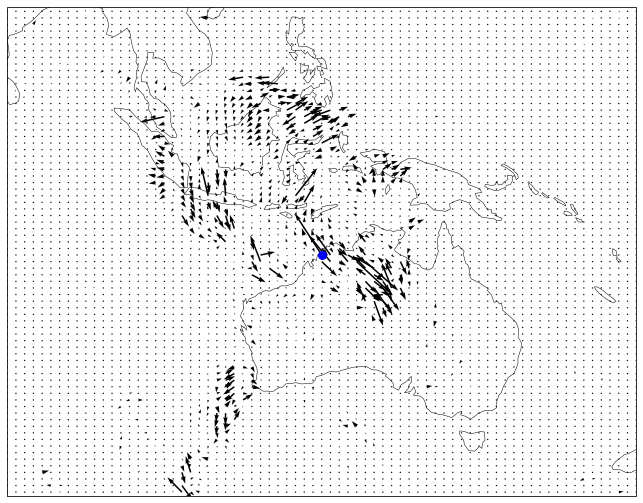

In [50]:
# Find columns in box over South America.
minLat = -20.
maxLat = 10.
minLon = 280.
maxLon = 315.

fig, axs = plt.subplots(1,1, figsize=(17, 9), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180.0)})

axs.coastlines(linewidth=0.5,edgecolor='blue')
# axs.set_extent([minLon,maxLon+6,minLat,maxLat], crs=ccrs.PlateCarree())

axs.plot(lon[ifocus_lon], lat[ifocus_lat],'o',color='blue',markersize=8,
        transform=ccrs.PlateCarree(central_longitude=180.0))
axs.quiver(lon, lat, ud2, vd2,
           scale=100., scale_units='height', angles='xy')


axs.set_extent([80,170,-50,20], crs=ccrs.PlateCarree())


(0.0, 22.0)

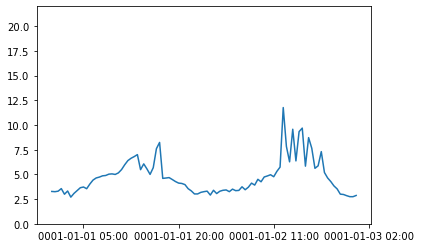

In [51]:
UBOT = np.sqrt( (claspDS.U.values[:,-1,ifocus_lat,ifocus_lon])**2 + 
                (claspDS.V.values[:,-1,ifocus_lat,ifocus_lon])**2)

plt.plot(claspDS.time.values, UBOT)
plt.ylim([0,22])
